Title         :- Loan Status Prediction


--------------------------------------------------------------------------

# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore') 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import learning_curve

Loading the dataset to pandas dataframe

In [2]:
loan_dataset = pd.read_csv('credit_train.csv')

In [3]:
loan_dataset.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
loan_dataset.shape

(100514, 19)

<Axes: xlabel='Loan Status', ylabel='count'>

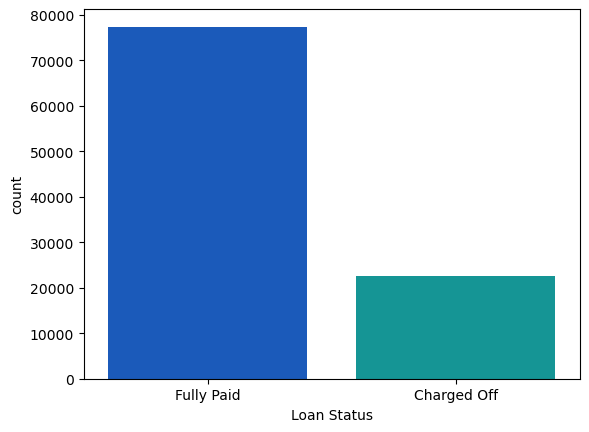

In [5]:
# Getting simple idea about loan status in the dataset

sns.countplot(x="Loan Status",data=loan_dataset, palette="winter")

In [6]:
# Most of the time loan will be approved for applicants

# Data Pre-processing

Describing the data

In [7]:
loan_dataset.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


Droping Columns

In [8]:
# 'Loan ID' and 'Customer ID' typically don't contribute much to the predictive power of a model

loan_dataset = loan_dataset.drop(['Loan ID', 'Customer ID'], axis=1)


In [9]:
# Maximum Open Credit' might be correlated with 'Current Credit Balance' and 'Credit Score', 

loan_dataset = loan_dataset.drop('Maximum Open Credit', axis=1)

In [10]:
# Number of Open Accounts is also no more important for loan status

loan_dataset = loan_dataset.drop('Number of Open Accounts', axis=1)

In [11]:
# According to above data there are some missing data in some columns

loan_dataset.isnull().sum()

Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Credit Problems         514
Current Credit Balance            514
Bankruptcies                      718
Tax Liens                         524
dtype: int64

<Axes: >

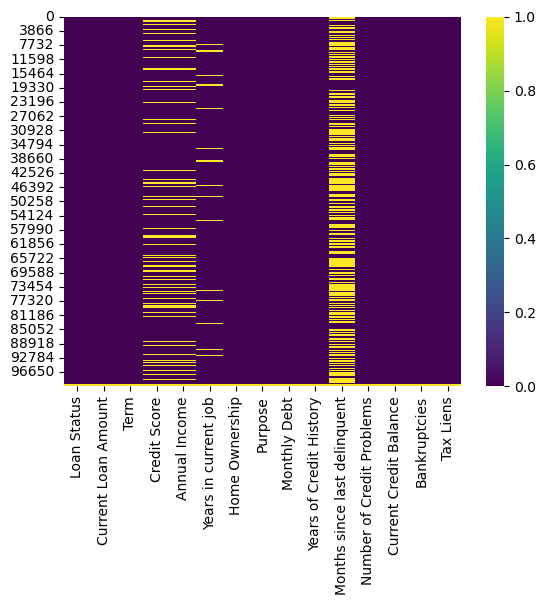

In [12]:
sns.heatmap(data=loan_dataset.isnull(),cmap='viridis')

In [13]:
#'Months since last delinquwnt' column has more missing values

loan_dataset = loan_dataset.drop('Months since last delinquent', axis=1)
loan_dataset = loan_dataset.drop('Years in current job', axis=1)

Filling missing values

In [14]:
loan_dataset['Credit Score'].fillna(loan_dataset['Credit Score'].mean(),inplace=True)
loan_dataset['Annual Income'].fillna(loan_dataset['Annual Income'].mean(),inplace=True)

In [15]:
loan_dataset = loan_dataset[pd.notnull(loan_dataset['Bankruptcies'])]

<Axes: >

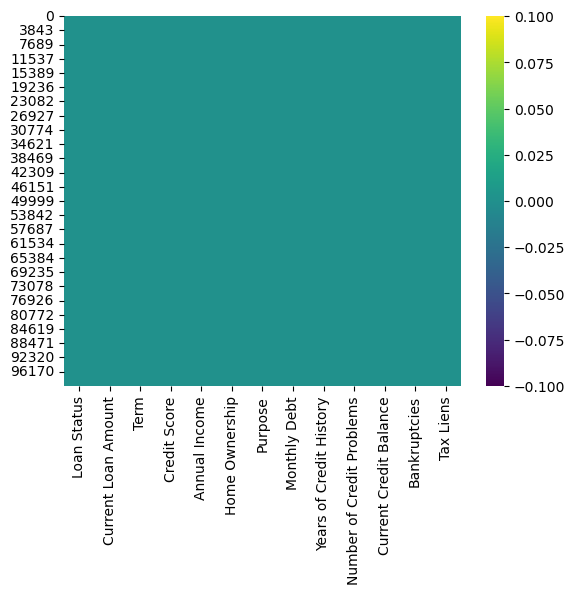

In [16]:
sns.heatmap(data=loan_dataset.isnull(),cmap='viridis')

Data Encoding

In [17]:
pd.get_dummies(loan_dataset['Term'].head())
term = pd.get_dummies(loan_dataset['Term'],drop_first=True)

In [18]:
pd.get_dummies(loan_dataset['Loan Status'].head())
loan = pd.get_dummies(loan_dataset['Loan Status'],drop_first=True)

In [19]:
loan_dataset = pd.concat([loan_dataset,term,loan], axis=1)
loan_dataset.head()
loan_dataset = loan_dataset.drop(['Term', 'Loan Status'], axis=1)


In [20]:
loan_dataset.replace({
                      "Home Ownership": {'Home Mortgage': 1, 'Rent': 0, 'Own Home': 2, 'HaveMortgage': 3},
                      "Purpose": {'Debt Consolidation': 1, 'Home Improvements': 0, 'other': 2, 'Business Loan': 3, 
                                  'Medical Bills': 4, 
                                  'Buy a Car': 5, 
                                  'Buy House': 6, 
                                  'Take a Trip': 7, 
                                  'major_purchase': 8, 
                                  'small_business': 9, 
                                  'moving': 10, 
                                  'vacation': 11, 
                                  'wedding': 12, 
                                  'Educational Expenses': 13,
                                  'renewable_energy':14,
                                  'Other':15}
                      
                     }, inplace=True)

In [21]:
loan_dataset.head()

,Current Loan Amount,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Short Term,Fully Paid
0,445412.0,709.000000,1.167493e+06,1,0,5214.74,17.2,1.0,228190.0,1.0,0.0,True,True
1,262328.0,1076.456089,1.378277e+06,1,1,33295.98,21.1,0.0,229976.0,0.0,0.0,True,True
2,99999999.0,741.000000,2.231892e+06,2,1,29200.53,14.9,1.0,297996.0,0.0,0.0,True,True
3,347666.0,721.000000,8.069490e+05,2,1,8741.90,12.0,0.0,256329.0,0.0,0.0,False,True
4,176220.0,1076.456089,1.378277e+06,0,1,20639.70,6.1,0.0,253460.0,0.0,0.0,True,True


In [22]:
# According to dataset identifying the least contributing feature

correlations = loan_dataset.corrwith(loan_dataset['Fully Paid'])
least_contributing_column = correlations.idxmin()
print(least_contributing_column)

Credit Score


In [23]:
loan_dataset = loan_dataset.drop('Credit Score', axis=1)

In [24]:
loan_dataset.head()

,Current Loan Amount,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Short Term,Fully Paid
0,445412.0,1.167493e+06,1,0,5214.74,17.2,1.0,228190.0,1.0,0.0,True,True
1,262328.0,1.378277e+06,1,1,33295.98,21.1,0.0,229976.0,0.0,0.0,True,True
2,99999999.0,2.231892e+06,2,1,29200.53,14.9,1.0,297996.0,0.0,0.0,True,True
3,347666.0,8.069490e+05,2,1,8741.90,12.0,0.0,256329.0,0.0,0.0,False,True
4,176220.0,1.378277e+06,0,1,20639.70,6.1,0.0,253460.0,0.0,0.0,True,True


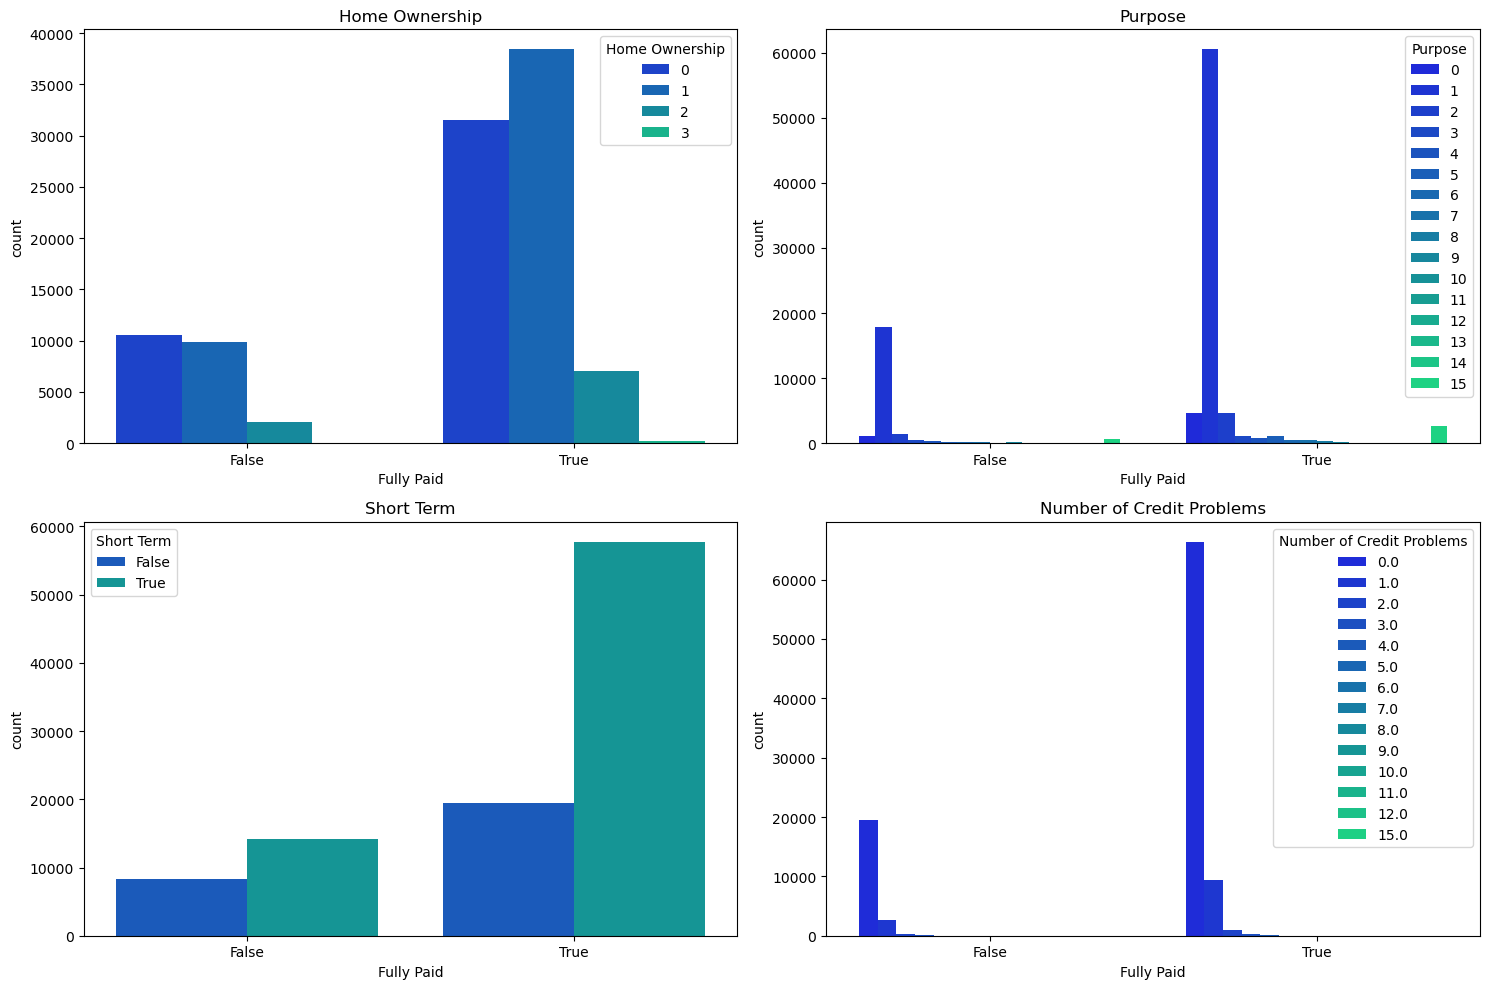

In [25]:
# Assuming loan_dataset is your DataFrame
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# List of features for the countplots
features = ["Home Ownership", "Purpose", "Short Term", "Number of Credit Problems"]

# Loop through the features and plot on each subplot
for i, feature in enumerate(features):
    row, col = divmod(i, 2)  # Calculate the row and column index
    sns.countplot(x="Fully Paid", hue=feature, data=loan_dataset, palette="winter", ax=axes[row, col])
    axes[row, col].set_title(feature)  # Set subplot title

# Adjust layout
plt.tight_layout()
plt.show()







In [26]:
loan_dataset.shape

(99796, 12)

In [27]:
# Taking a random sample of data as dataset

sample_fraction = 0.05  # 20% of the data
loan_dataset = loan_dataset.sample(frac=sample_fraction)
loan_dataset.shape

(4990, 12)

# Spliting Data for Training & Testing

Choosing dependent and independent variables

In [28]:
X =  loan_dataset.drop(columns=['Fully Paid'], axis=1)
y = loan_dataset['Fully Paid']

In [29]:
X.head()

,Current Loan Amount,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Short Term
40553,99999999.0,1830384.0,0,2,39963.46,23.0,0.0,205067.0,0.0,0.0,True
74244,165506.0,2382372.0,0,1,30176.56,14.0,0.0,467191.0,0.0,0.0,True
66933,99999999.0,1446527.0,1,1,22059.38,15.2,1.0,187720.0,1.0,0.0,True
74218,539792.0,3748719.0,2,2,47483.85,26.5,0.0,241680.0,0.0,0.0,False
13893,431464.0,1825881.0,1,1,37080.59,31.2,0.0,203718.0,0.0,0.0,False


In [30]:
y.head()

40553    True
74244    True
66933    True
74218    True
13893    True
Name: Fully Paid, dtype: bool

Splitting dataset to train and test

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify = y, random_state=2)

In [32]:
len(X)

4990

In [33]:
len(X_train)

3992

In [34]:
len(X_test)

998

# Visualize Dataset to Select a Model

Loan Status VS Current Loan Amount

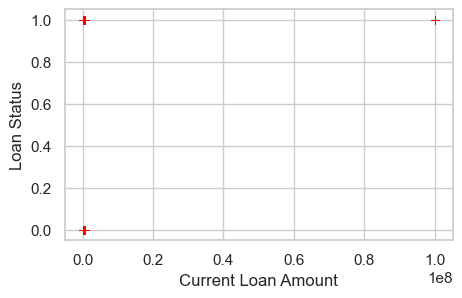

In [35]:
sns.set(style="whitegrid")  
plt.figure(figsize=(5, 3))  
sns.scatterplot(x='Current Loan Amount', y='Fully Paid', data=loan_dataset, color='red', marker='+')
plt.xlabel('Current Loan Amount')
plt.ylabel('Loan Status')
plt.show()

Loan Status VS Annual Income

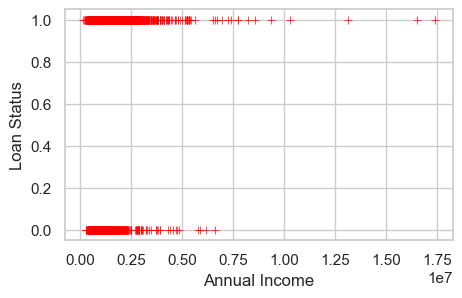

In [36]:
sns.set(style="whitegrid")  
plt.figure(figsize=(5, 3))  
sns.scatterplot(x='Annual Income', y='Fully Paid', data=loan_dataset, color='red', marker='+')
plt.xlabel('Annual Income')
plt.ylabel('Loan Status')
plt.show()

Loan Status VS Home Ownership

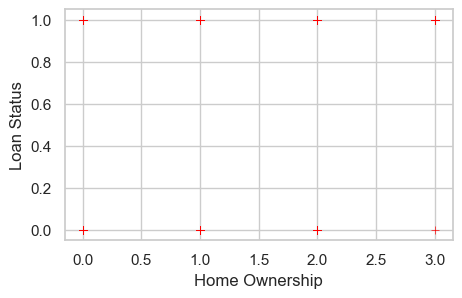

In [37]:
sns.set(style="whitegrid")  
plt.figure(figsize=(5, 3))  
sns.scatterplot(x='Home Ownership', y='Fully Paid', data=loan_dataset, color='red', marker='+')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Status')
plt.show()

Loan Status VS Purpose

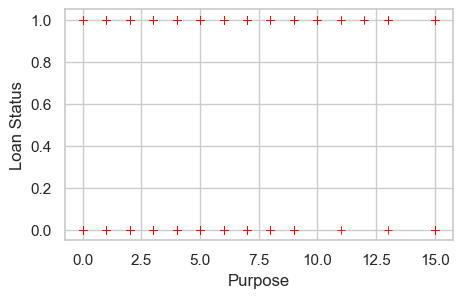

In [38]:
sns.set(style="whitegrid")  
plt.figure(figsize=(5, 3))  
sns.scatterplot(x='Purpose', y='Fully Paid', data=loan_dataset, color='red', marker='+')
plt.xlabel('Purpose')
plt.ylabel('Loan Status')
plt.show()

Loan Status VS Monthly Debt

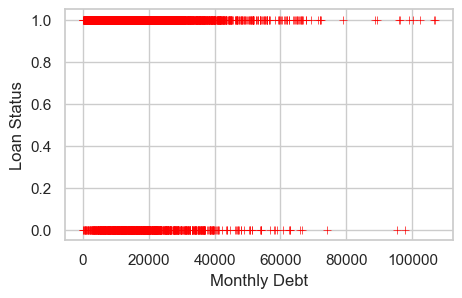

In [39]:
sns.set(style="whitegrid")  
plt.figure(figsize=(5, 3))  
sns.scatterplot(x='Monthly Debt', y='Fully Paid', data=loan_dataset, color='red', marker='+')
plt.xlabel('Monthly Debt')
plt.ylabel('Loan Status')
plt.show()

Loan Status VS Years of Credit History

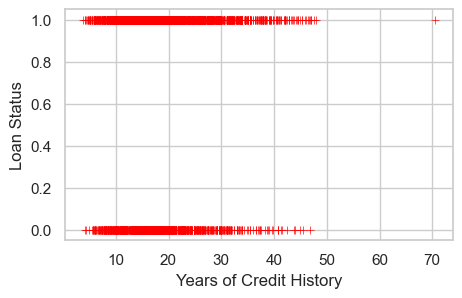

In [40]:
sns.set(style="whitegrid")  
plt.figure(figsize=(5, 3))  
sns.scatterplot(x='Years of Credit History', y='Fully Paid', data=loan_dataset, color='red', marker='+')
plt.xlabel('Years of Credit History')
plt.ylabel('Loan Status')
plt.show()

Loan Status VS Number of Credit Problems

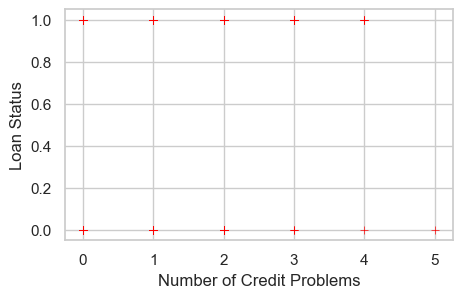

In [41]:
sns.set(style="whitegrid")  
plt.figure(figsize=(5, 3))  
sns.scatterplot(x='Number of Credit Problems', y='Fully Paid', data=loan_dataset, color='red', marker='+')
plt.xlabel('Number of Credit Problems')
plt.ylabel('Loan Status')
plt.show()

# Select Models

According to the visual representation, it is better to use "Logistic Regression" model and "SVM" model

Logistic Regression Model

In [42]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)

LogisticRegression()

In [43]:
predection = model_logistic.predict(X_test)


In [44]:
model_logistic.score(X_train,y_train)

0.7783066132264529

In [45]:
model_logistic.score(X_test,y_test)

0.7785571142284569

In [46]:
classification_report(y_test,predection)

'              precision    recall  f1-score   support\n\n       False       0.00      0.00      0.00       221\n        True       0.78      1.00      0.88       777\n\n    accuracy                           0.78       998\n   macro avg       0.39      0.50      0.44       998\nweighted avg       0.61      0.78      0.68       998\n'

In [47]:
#Logistic Regression Model

accuracy_score(y_test,predection) 

0.7785571142284569

In [48]:
confusion_matrix(y_test,predection)

array([[  0, 221],
       [  0, 777]], dtype=int64)

In [49]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




Support Vector Model

In [50]:
model_svm = svm.SVC()

In [51]:
model_svm.fit(X_train_scaled, y_train)

SVC()

In [52]:
predection = model_logistic.predict(X_test_scaled)

In [53]:
classification_report(y_test,predection)

'              precision    recall  f1-score   support\n\n       False       0.23      0.44      0.30       221\n        True       0.78      0.58      0.67       777\n\n    accuracy                           0.55       998\n   macro avg       0.51      0.51      0.48       998\nweighted avg       0.66      0.55      0.58       998\n'

In [54]:
#Support Vector Model

accuracy_score(y_test,predection)

0.5470941883767535

# k-fold Cross-Validation

In [55]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [56]:
cross_val_results_logistic = cross_val_score(model_logistic, X, y, cv=kf)

In [57]:
#Logistic Regression Model

print(f'Cross-Validation Results (Accuracy): {cross_val_results_logistic}')
print(f'Mean Accuracy: {cross_val_results_logistic.mean()}')

Cross-Validation Results (Accuracy): [0.78256513 0.75651303 0.78256513 0.78256513 0.78757515]
Mean Accuracy: 0.7783567134268538


In [58]:
cross_val_results_svm = cross_val_score(model_svm, X, y, cv=kf)

In [59]:
#Support Vector Model

print(f'Cross-Validation Results (Accuracy): {cross_val_results_svm}')
print(f'Mean Accuracy: {cross_val_results_svm.mean()}')

Cross-Validation Results (Accuracy): [0.78256513 0.75651303 0.78256513 0.78256513 0.78757515]
Mean Accuracy: 0.7783567134268538


# Results Visual Representation

Confusion Matrix

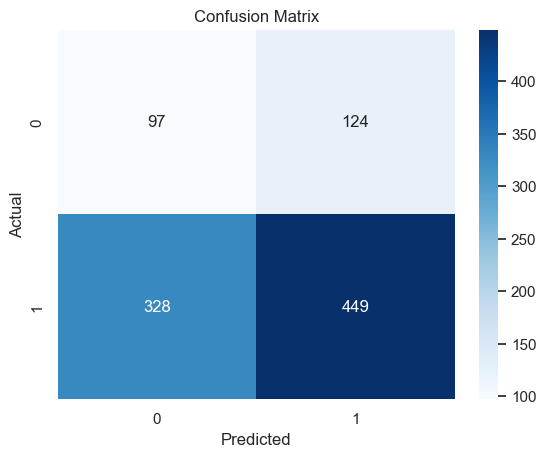

In [60]:
cm = confusion_matrix(y_test,predection)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

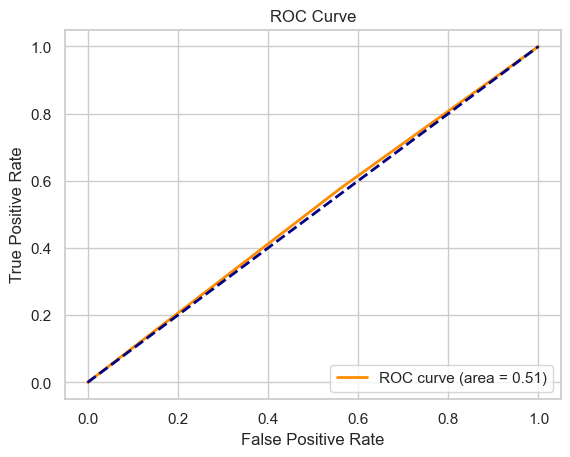

In [61]:
fpr, tpr, _ = roc_curve(y_test,predection)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

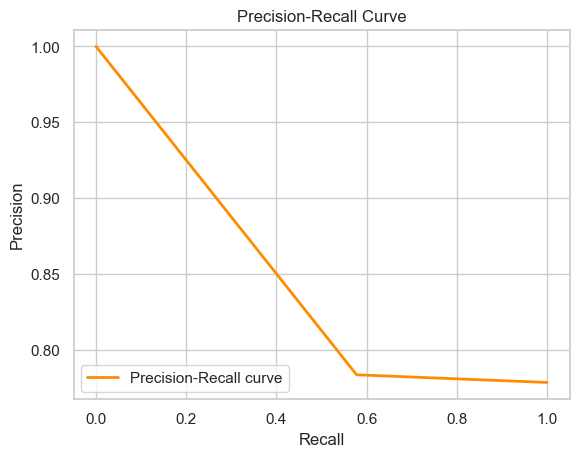

In [62]:
precision, recall, _ = precision_recall_curve(y_test,predection)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

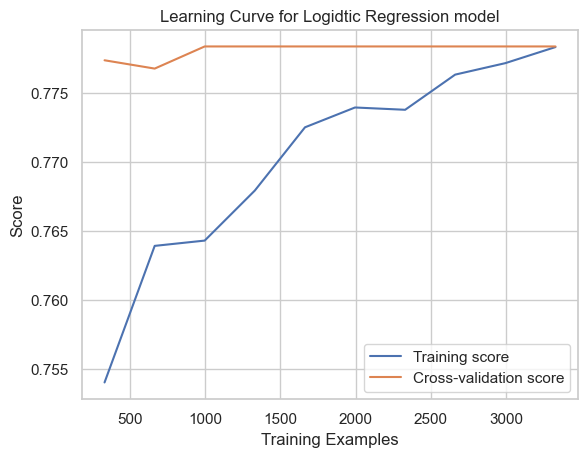

In [63]:
train_sizes, train_scores, test_scores = learning_curve(model_logistic, X, y, cv=3, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve for Logidtic Regression model')
plt.legend(loc="best")
plt.show()

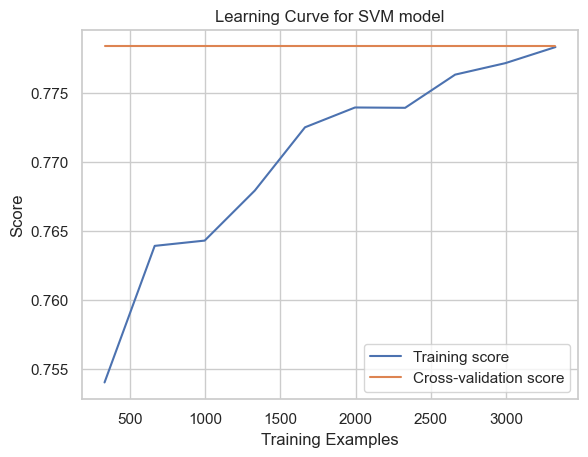

In [64]:
train_sizes, train_scores, test_scores = learning_curve(model_svm, X, y, cv=3, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve for SVM model')
plt.legend(loc="best")
plt.show()

# Hyperparameter Optimization

Hyperparameter Optimization - Logistic Regression

In [65]:
param_grid = [
    {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': np.logspace(-2, 2, 5),  # Adjusted the range for C
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 500, 1000],  # Adjusted the values for max_iter
        'l1_ratio': np.linspace(0, 1, 3),  # Added l1_ratio for elasticnet
    }
]

In [66]:
Clasiffier_logistic = GridSearchCV(model_logistic, param_grid = param_grid, cv=3, verbose=True, n_jobs=-1)

In [67]:
best_Clasiffier_logistic= Clasiffier_logistic.fit(X_train,y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


In [68]:
best_Clasiffier_logistic.best_estimator_

LogisticRegression(l1_ratio=0.0, penalty='l1', solver='liblinear')

In [69]:
#Logistic Regression Model

print(f'Accuracy - : {best_Clasiffier_logistic.score(X_test,y_test):.3f}')

Accuracy - : 0.779


In [70]:
classification_report(y_test,predection)

'              precision    recall  f1-score   support\n\n       False       0.23      0.44      0.30       221\n        True       0.78      0.58      0.67       777\n\n    accuracy                           0.55       998\n   macro avg       0.51      0.51      0.48       998\nweighted avg       0.66      0.55      0.58       998\n'

Hyperparameter Optimization - SVM

In [71]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],
}


In [72]:
Clasiffier_svm = GridSearchCV(svm.SVC(),param_grid)

In [73]:
best_Classiffier_svm = Clasiffier_svm.fit(X_train_scaled,y_train)

In [74]:
best_Classiffier_svm.best_estimator_

SVC(C=0.001, degree=2, kernel='linear')

In [75]:
#Support Vector Model

print(f'Accuracy - : {best_Classiffier_svm.score(X_test_scaled,y_test):.3f}')

Accuracy - : 0.779


In [76]:
classification_report(y_test,predection)

'              precision    recall  f1-score   support\n\n       False       0.23      0.44      0.30       221\n        True       0.78      0.58      0.67       777\n\n    accuracy                           0.55       998\n   macro avg       0.51      0.51      0.48       998\nweighted avg       0.66      0.55      0.58       998\n'